In [3]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
file = 'selatmalaka.nc'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    cdm_data_type: Grid
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_email: dsandwell@ucsd.edu
    creator_name: David T. Sandwell
    creator_type: person
    creator_url: https://topex.ucsd.edu/sandwell/
    Easternmost_Easting: 105.00416666666666
    geospatial_lat_max: 5.504166666666663
    geospatial_lat_min: 0.5041666666666629
    geospatial_lat_resolution: 0.008333333333333333
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 105.00416666666666
    geospatial_lon_min: 95.50416666666666
    geospatial_lon_resolution: 0.008333333333333333
    geospatial_lon_units: degrees_east
    GMT_version: 4.5.12 [64-bit]
    history: xyz2grd -V -Rg -I30c topo30 -Gtopo30.grd=ns -ZTLhw -F
2021-12-07T10:35:33Z ftp://topex.ucsd.edu/pub/srtm30_plus/topo30.grd
2021-12-07T10:35:33Z http://coastwatch.pfeg.noaa.gov/erddap/griddap/srtm30plus.nc?z%5B(0.5041666666666629):(5.504166666666

In [5]:
zlatlon = ds.variables['z'][:,:]
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
ds.close()

In [6]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=95.5, \
           urcrnrlon=105,llcrnrlat=0.5,urcrnrlat=5.5,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{95.5: ([<matplotlib.lines.Line2D at 0x1c34a60f850>],
  [Text(1056.351305704471, -10563.51305704471, '95.5°E')]),
 96.5: ([<matplotlib.lines.Line2D at 0x1c34a6324c0>],
  [Text(111973.23840467393, -10563.51305704471, '96.5°E')]),
 97.5: ([<matplotlib.lines.Line2D at 0x1c34a632790>],
  [Text(222890.1255036434, -10563.51305704471, '97.5°E')]),
 98.5: ([<matplotlib.lines.Line2D at 0x1c34a632a60>],
  [Text(333807.01260261284, -10563.51305704471, '98.5°E')]),
 99.5: ([<matplotlib.lines.Line2D at 0x1c34a632d30>],
  [Text(445780.2510072868, -10563.51305704471, '99.5°E')]),
 100.5: ([<matplotlib.lines.Line2D at 0x1c34a62c070>],
  [Text(556697.1381062563, -10563.51305704471, '100.5°E')]),
 101.5: ([<matplotlib.lines.Line2D at 0x1c34a62c310>],
  [Text(667614.0252052257, -10563.51305704471, '101.5°E')]),
 102.5: ([<matplotlib.lines.Line2D at 0x1c34a62c5e0>],
  [Text(778530.9123041952, -10563.51305704471, '102.5°E')]),
 103.5: ([<matplotlib.lines.Line2D at 0x1c34a62c8b0>],
  [Text(890504.1507088691

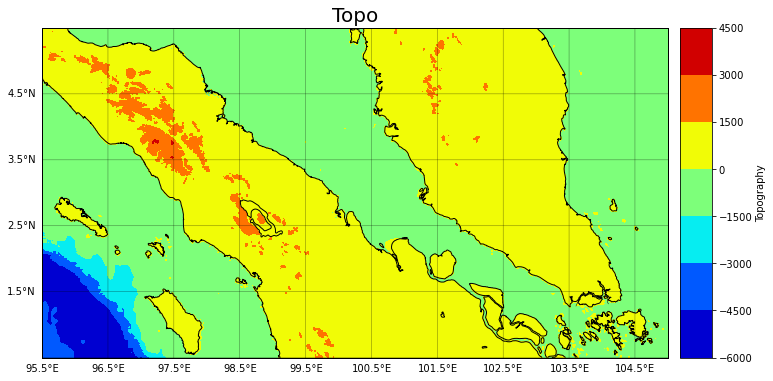

In [11]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,zlatlon,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Topography',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('Topo',fontsize=20)
m.drawparallels(np.arange(0.5, 5.5, 1), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(95.5, 105, 1), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')

In [9]:
#plt.savefig('selatmalaka.PNG', bbox_inches = 'tight', dpi = 200, pad_inches = 0.5)

In [10]:
file = 'selatmakassar.nc'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    cdm_data_type: Grid
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_email: dsandwell@ucsd.edu
    creator_name: David T. Sandwell
    creator_type: person
    creator_url: https://topex.ucsd.edu/sandwell/
    Easternmost_Easting: 120.50416666666666
    geospatial_lat_max: 1.0041666666666629
    geospatial_lat_min: -2.995833333333337
    geospatial_lat_resolution: 0.008333333333333333
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 120.50416666666666
    geospatial_lon_min: 116.00416666666666
    geospatial_lon_resolution: 0.008333333333333333
    geospatial_lon_units: degrees_east
    GMT_version: 4.5.12 [64-bit]
    history: xyz2grd -V -Rg -I30c topo30 -Gtopo30.grd=ns -ZTLhw -F
2021-12-07T10:40:16Z ftp://topex.ucsd.edu/pub/srtm30_plus/topo30.grd
2021-12-07T10:40:16Z http://coastwatch.pfeg.noaa.gov/erddap/griddap/srtm30plus.nc?z%5B(-2.995833333333337):(1.0041666666

In [11]:
zlatlon = ds.variables['z'][:,:]
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
ds.close()

In [13]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=116, \
           urcrnrlon=120.5,llcrnrlat=-3,urcrnrlat=1,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{116.0: ([<matplotlib.lines.Line2D at 0x1f53117cbb0>],
  [Text(500.3769342810653, -5003.769342810654, '116°E')]),
 117.0: ([<matplotlib.lines.Line2D at 0x1f53118d940>],
  [Text(111584.05634467756, -5003.769342810654, '117°E')]),
 118.0: ([<matplotlib.lines.Line2D at 0x1f53118dc10>],
  [Text(222667.73575507407, -5003.769342810654, '118°E')]),
 119.0: ([<matplotlib.lines.Line2D at 0x1f53118dee0>],
  [Text(333751.41516547056, -5003.769342810654, '119°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x1f5311971f0>],
  [Text(444835.09457586706, -5003.769342810654, '120°E')])}

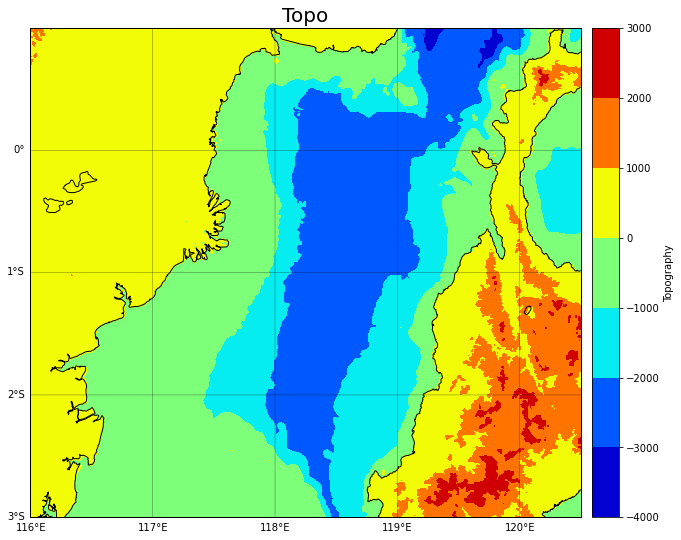

In [14]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,zlatlon,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Topography',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('Topo',fontsize=20)
m.drawparallels(np.arange(-3, 1, 1), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(116, 120.5, 1), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')

In [15]:
#plt.savefig('selatmakassar.PNG', bbox_inches = 'tight', dpi = 200, pad_inches = 0.5)

In [28]:
file = 'bob.nc'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    cdm_data_type: Grid
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_email: dsandwell@ucsd.edu
    creator_name: David T. Sandwell
    creator_type: person
    creator_url: https://topex.ucsd.edu/sandwell/
    Easternmost_Easting: 96.70416666666667
    geospatial_lat_max: 24.60416666666667
    geospatial_lat_min: 5.504166666666663
    geospatial_lat_resolution: 0.008333333333333333
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 96.70416666666667
    geospatial_lon_min: 78.20416666666667
    geospatial_lon_resolution: 0.008333333333333333
    geospatial_lon_units: degrees_east
    GMT_version: 4.5.12 [64-bit]
    history: xyz2grd -V -Rg -I30c topo30 -Gtopo30.grd=ns -ZTLhw -F
2021-12-07T10:43:01Z ftp://topex.ucsd.edu/pub/srtm30_plus/topo30.grd
2021-12-07T10:43:01Z http://coastwatch.pfeg.noaa.gov/erddap/griddap/srtm30plus.nc?z%5B(5.504166666666663):(24.60416666666667)

In [29]:
zlatlon = ds.variables['z'][:,:]
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
ds.close()

In [33]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=78.2, \
           urcrnrlon=96.7,llcrnrlat=5.5,urcrnrlat=24.6,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{78.2: ([<matplotlib.lines.Line2D at 0x1f537c95a60>],
  [Text(2057.105174266602, -23073.753378292815, '78.2°E')]),
 81.2: ([<matplotlib.lines.Line2D at 0x1f537ca2be0>],
  [Text(335308.1434054561, -23073.753378292815, '81.2°E')]),
 84.2: ([<matplotlib.lines.Line2D at 0x1f537ca2eb0>],
  [Text(668559.1816366456, -23073.753378292815, '84.2°E')]),
 87.2: ([<matplotlib.lines.Line2D at 0x1f537ca61c0>],
  [Text(1001810.219867835, -23073.753378292815, '87.2°E')]),
 90.2: ([<matplotlib.lines.Line2D at 0x1f537ca6490>],
  [Text(1335061.2580990246, -23073.753378292815, '90.2°E')]),
 93.2: ([<matplotlib.lines.Line2D at 0x1f537ca6760>],
  [Text(1668312.296330214, -23073.753378292815, '93.2°E')]),
 96.2: ([<matplotlib.lines.Line2D at 0x1f537ca6a30>],
  [Text(2001563.3345614036, -23073.753378292815, '96.2°E')])}

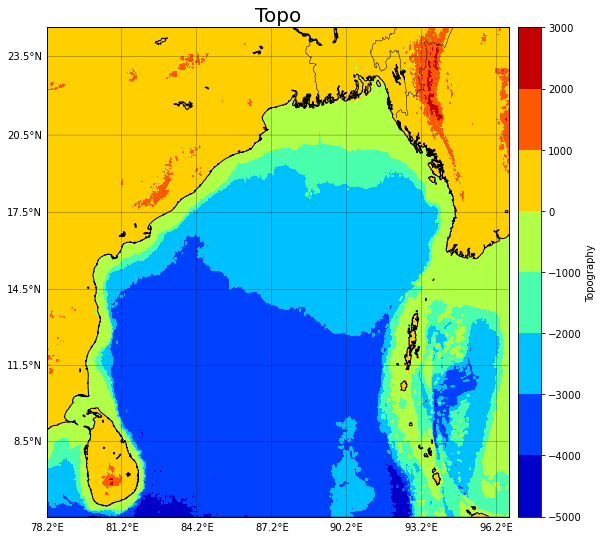

In [34]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,zlatlon,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Topography',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('Topo',fontsize=20)
m.drawparallels(np.arange(5.5, 24.6, 3), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(78.2, 96.7, 3), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')